In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

import nltk
import re
import string

import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

from sklearn.neighbors import KNeighborsClassifier


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v-ashkha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
data = pd.read_csv('spam.csv',encoding= 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1, inplace=True)

In [8]:
data.columns = ['label','text']
data.head(3)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


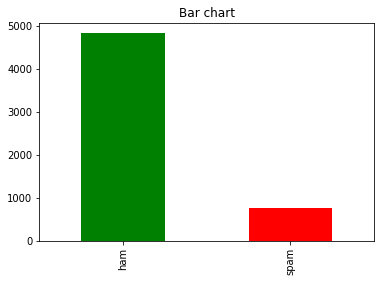

In [9]:

count_label=pd.value_counts(data["label"], sort= True)
count_label.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

In [10]:
def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text

data['new_text']=data['text'].apply(lambda row : remove_punctuation(row))


In [11]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

In [12]:
data['tokenized_text']=data['new_text'].apply(lambda row : tokenize(row.lower()))
data.head()

,label,text,new_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [13]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [14]:
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text 
data['clean_text']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,new_text,tokenized_text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [15]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    stemmed_text=[ps.stem(word) for word in tokenized_text]
    return stemmed_text

data['stemmed_text']=data.clean_text.apply(lambda row : stemming(row))
data[['text','stemmed_text']].head()

,text,stemmed_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho..."


In [16]:
def get_final_text(stemmed_text):
    final_text=" ".join([word for word in stemmed_text])
    return final_text

data['final_text']=data.stemmed_text.apply(lambda row : get_final_text(row))
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


In [17]:
data['word_count'] = pd.Series(data['final_text'].tolist()).astype(str).apply(lambda x: len(x.split(' ')))
data['char_count'] = pd.Series(data['final_text'].tolist()).astype(str).apply(len)
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text,word_count,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,16,76
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,6,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,23,131
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,9,35
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,8,41


C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


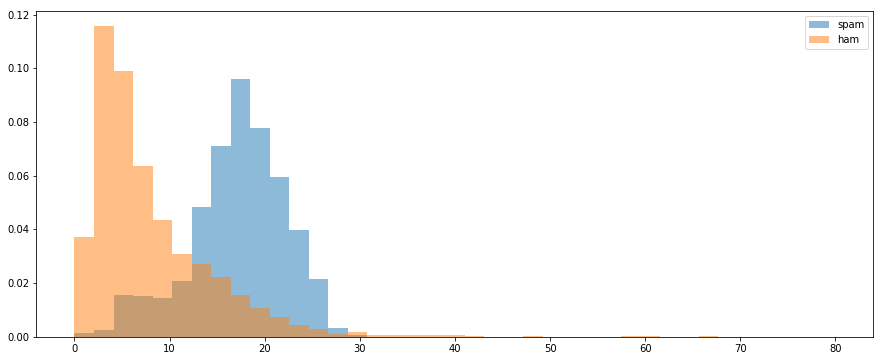

In [21]:
# how do they look like ? 
#1 len
%matplotlib inline
pyplot.figure(figsize=(15,6))

bins = np.linspace(0,80,num=40)
pyplot.hist(data[data['label']=='spam']['word_count'],bins,alpha=0.5,label='spam',normed=True)
pyplot.hist(data[data['label']=='ham']['word_count'],bins,alpha =0.5,label ='ham', normed=True)
pyplot.legend(loc ='upper right')
pyplot.show()

C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


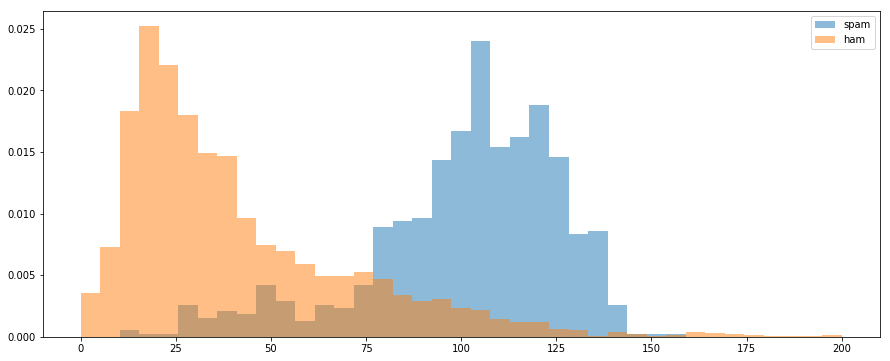

In [23]:
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(15,6))

bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']=='spam']['char_count'],bins,alpha=0.5,label='spam',normed=True)
pyplot.hist(data[data['label']=='ham']['char_count'],bins,alpha =0.5,label ='ham', normed=True)
pyplot.legend(loc ='upper right')
pyplot.show()

In [25]:
data['long_number'] = data['text'].apply(lambda x : len(re.findall('\d{7,}',x)))
data['short_number'] = data['text'].apply(lambda x : len(re.findall('\d{4,6}',x)))

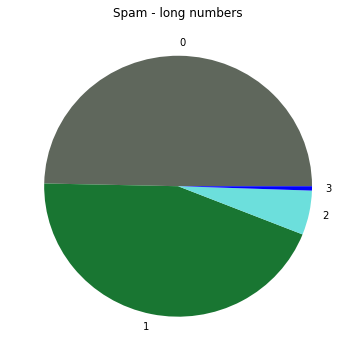

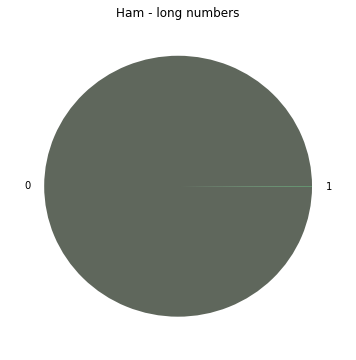

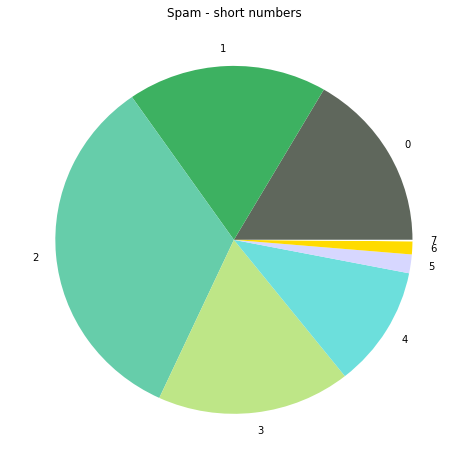

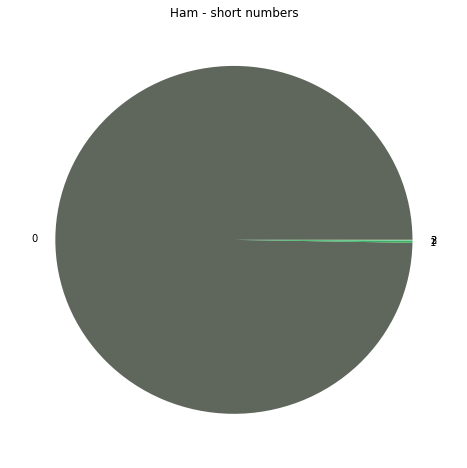

In [32]:

pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='spam']['long_number'].value_counts(),labels=['0','1','2','3'], 
           colors=['#5f675c','#197632','#6cdfdc','blue'],)
pyplot.title("Spam - long numbers")
pyplot.show()


pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='ham']['long_number'].value_counts(),labels=['0','1'], 
           colors=['#5f675c','#197632'],)
pyplot.title("Ham - long numbers")
pyplot.show()

# short Numbers
green_pallete = ['#5f675c','#3db161','#66cdaa','#bee687','#6cdfdc','#d7d7ff','#ffdb00','white']

spam_x = data[data['label']=='spam']['short_number'].value_counts()
spam_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(spam_x,labels=spam_x.index,startangle=0,colors=green_pallete)
pyplot.title("Spam - short numbers")
pyplot.show()

ham_x = data[data['label']=='ham']['short_number'].value_counts()
ham_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(ham_x,labels=ham_x.index, colors=green_pallete)
pyplot.title("Ham - short numbers")
pyplot.show()



In [54]:
#feature engineering 
1. word count
2. chart count
3. tfidf


In [34]:

tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(data.final_text)
tfidf_vec.toarray() # creates a sparse matrix

tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
final_data=pd.concat([data['word_count'],data['char_count'],data['short_number'],data['long_number'],tfidf_data],axis=1)
final_data.head()

,word_count,char_count,short_number,long_number,0,1,2,3,4,5,...,8016,8017,8018,8019,8020,8021,8022,8023,8024,8025
0,16,76,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,21,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,131,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,35,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,41,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data,data['label'], test_size = .2)

In [56]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [61]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=1)
rf_model = rf.fit(X_train,Y_train)

In [58]:
rf_model


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rf_prediction = rf_model.predict(X_test)

precision, recall, fscore, support  = score(Y_test,rf_prediction, pos_label = 'spam', average = 'binary')

In [63]:
print('Precision: {} / recall: {},  Accuracy: {}'.format(round(precision,3), 
                                                        round(recall,3), 
                                                        round((rf_prediction==Y_test).sum()/len(rf_prediction),3) ))

Precision: 0.993 / recall: 0.919,  Accuracy: 0.988


In [44]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((rf_prediction==Y_test).sum() / len(rf_prediction),3)))

Precision: 0.986 / Recall: 0.926 / Accuracy: 0.988


In [56]:
#GRid search

In [42]:
params = {'n_estimators': [50,75,100],
         'max_depth': [20,40,60,None]}

rf_GS = RandomForestClassifier()
gs = GridSearchCV(rf_GS, params, cv = 7, n_jobs= 1)
gsFit = gs.fit(tfidf_data, data['label'])

In [43]:
print(gsFit.best_params_)
print(gsFit.best_score_)

{'max_depth': None, 'n_estimators': 75}
0.9755922469490309


In [46]:
SVM_classfication = svm.SVC(C=10)
SVM_classfication.fit(X_train,Y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svc_prediction = SVM_classfication.predict(X_test)
precision, recall, fscore, support  = score(Y_test,svc_prediction, pos_label = 'spam', average = 'binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((svc_prediction==Y_test).sum() / len(svc_prediction),3)))

Precision: 1.0 / Recall: 0.671 / Accuracy: 0.956


In [48]:
SV_params = {'C':[0.001,.01,.1, 1,100,1000]}
grid_svm = svm.SVC()
Sgrid = GridSearchCV(grid_svm, SV_params,cv = 5,n_jobs=1)
SVmGridFIT = Sgrid.fit(X_train,Y_train)
print(SVmGridFIT.best_params_)
print(SVmGridFIT.best_score_)

{'C': 100}
0.9748709894547902


In [67]:

parameters_KNN = {'n_neighbors': (7,10,15,17), }

grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(X_train, Y_train)
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.3min finished


{'n_neighbors': 7}
0.9488445142472515


In [76]:
def plot_confusion_matrix(y_true, y_pred,header):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(header)

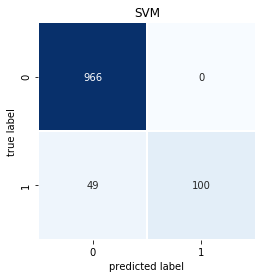

In [77]:

plot_confusion_matrix(Y_test,svc_prediction,"SVM")

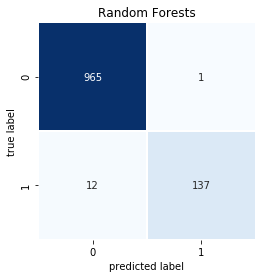

In [78]:
plot_confusion_matrix(Y_test,rf_prediction,"Random Forests")